# パーセプトロンの演習
scikit-learnを使ったパーセプトロンによる２値分類を行います。


In [0]:
%matplotlib inline

# 「%」はマジックコマンド。IPythonで使用可能。%lsmagicで確認可能。
# 
# 「#」は１行コメント。「'''」で囲むと複数行コメント。
# 
# 「!」はOSコマンド実行。「」とか。
# 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Text(0, 0.5, 'Feature 2')

<Figure size 432x288 with 0 Axes>

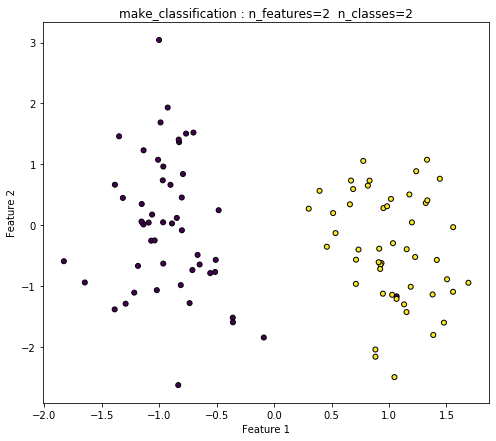

In [2]:
# データ生成
from sklearn.datasets import make_classification

X, Y = make_classification(random_state=12,
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=1,
                           n_clusters_per_class=1,
                           n_classes=2)

fig = plt.figure()
plt.figure(figsize=(8, 7))
plt.title("make_classification : n_features=2  n_classes=2")
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [3]:
########################
# パーセプトロン
########################
from sklearn.linear_model import Perceptron

# トレーニング・テストデータ分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

# Perceptron
ppt = Perceptron()
ppt.fit(X_train, Y_train)

# 予測　
Y_pred = ppt.predict(X_test)

#
# 評価
#
# 平均絶対誤差(MAE)
mae = mean_absolute_error(Y_test, Y_pred)
# 平方根平均二乗誤差（RMSE）
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
# スコア
score = ppt.score(X_test, Y_test)

coef = ppt.coef_[0]
intercept = ppt.intercept_

print("MAE = %.3f,  RMSE = %.3f,  score = %.3f" % (mae, rmse, score))
print("Coef =", coef)
print("Intercept =", intercept)

MAE = 0.040,  RMSE = 0.200,  score = 0.960
Coef = [3.73334346 2.20831103]
Intercept = [-1.]


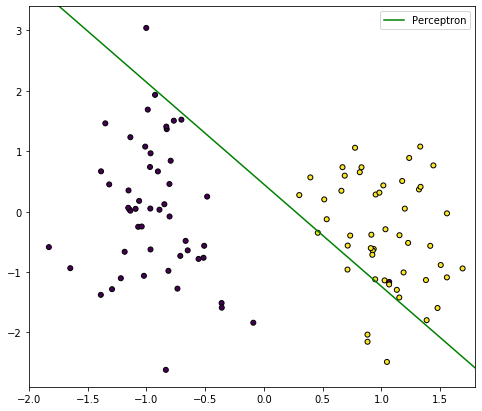

In [4]:
# プロット
plt.figure(figsize=(8, 7))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k')

line = np.linspace(-15, 15)
plt.plot(line, -(line * coef[0] + intercept) / coef[1], c='g', label="Perceptron")
plt.ylim(-2.9, 3.4)
plt.xlim(-2, 1.8)
plt.legend()